# Predicting Customer Churn: A Machine Learning Approach to Retention Strategy

   The primary objective of this analysis is to develop a predictive model that can accurately forecast whether a customer will churn or remain with the business. The focus will be on prediction, with an emphasis on maximizing model accuracy while ensuring interpretability. This analysis will provide valuable insights to stakeholders by identifying key factors influencing customer churn, enabling the business to implement targeted strategies to reduce churn and improve customer retention.
   
   First, we'll read the data from a csv file. The data has already been preprocessed into nice dataframe with the correct value for each atribute.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('churndata_processed.csv')
data.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  payment_Credit Card        7043 non-null   int64

In [4]:
round(data.describe(),2)

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,...,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.43,0.42,0.24,0.29,0.34,0.34,0.29,0.67,0.38,0.59,...,0.39,0.05,0.23,0.43,0.22,0.07,0.12,0.06,0.09,0.11
std,0.40,0.49,0.24,0.45,0.48,0.48,0.45,0.47,0.42,0.49,...,0.49,0.23,0.42,0.50,0.41,0.26,0.32,0.24,0.28,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.25,0.00,0.20,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.75,1.00,0.32,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## About the dataset

This dataset is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically, it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset columns are as follows:

*   Customers who left within the last month in the `churn_value` column.
*   Services that each customer has signed up for such as: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies in these columns: `multiple`, `gb_mon`, `security`, `backup`, `protection`, `support`, `unlimited`, `internet_type_DSL`, `internet_type_Fiber Optic`, `internet_type_None`.
*   Customer account information such as: how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges in these columns: `months`, `contract`, `paperless`, `monthly`, `satisfaction`, `payment_Credit Card`, `payment_Mailed Check`.
*   Demographic info about customers such as: gender, age range, and if they have partners and dependents.

## Data Exploration, Cleaning, and Feature Engineering

In the data exploration phase, variables were classified into different types, including binary, categorical (both ordinal and non-ordinal), and numeric. First, we identified the number of unique values for each variable to create separate lists for binary, categorical, ordinal, and numeric variables. For instance, binary variables like "churn" were identified based on their two unique values.

The **'months'** variable, while numeric, was transformed into an ordinal variable by binning it into distinct ranges. Other categorical variables were inspected to determine whether they should be encoded ordinally, and attributes like 'contract' and 'satisfaction' were encoded as ordinal features.

Next, non-numeric features were encoded using appropriate encoding methods. Ordinal variables were transformed using the LabelEncoder, while binary variables were binarized using LabelBinarizer. Non-ordinal categorical variables were one-hot encoded to avoid introducing unintended order.

Since certain algorithms, such as K-nearest neighbors, require scaled data, all numeric and ordinal variables were scaled using the **MinMaxScaler** method, which normalizes the data between 0 and 1.

## Model Training

Three different classifier models were trained: logistic regression as a baseline model, decision trees for interpretability, and a random forest ensemble model for improved predictive accuracy. All models were trained using the same data split into training and testing sets to ensure consistency in evaluation. Cross-validation was applied to fine-tune the hyperparameters of each model, and performance metrics such as accuracy, precision, recall, and F1-score were used to compare results.

In [5]:
# Importing the libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# Separate the target variable 'y' and the features 'X'
X = data.drop('churn_value', axis=1)
y = data['churn_value']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# 1. Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9469947941315665
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1524
           1       0.94      0.87      0.90       589

    accuracy                           0.95      2113
   macro avg       0.94      0.92      0.93      2113
weighted avg       0.95      0.95      0.95      2113

Confusion Matrix:
 [[1490   34]
 [  78  511]]


In [9]:
# 2. Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))



Decision Tree Accuracy: 0.9247515380974917
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1524
           1       0.86      0.87      0.87       589

    accuracy                           0.92      2113
   macro avg       0.91      0.91      0.91      2113
weighted avg       0.93      0.92      0.92      2113

Confusion Matrix:
 [[1440   84]
 [  75  514]]


In [10]:
# 3. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Accuracy: 0.9441552295314718
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1524
           1       0.94      0.85      0.89       589

    accuracy                           0.94      2113
   macro avg       0.94      0.92      0.93      2113
weighted avg       0.94      0.94      0.94      2113

Confusion Matrix:
 [[1493   31]
 [  87  502]]


In [11]:
# Cross-validation for each model
logreg_cv = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
dtree_cv = cross_val_score(dtree, X, y, cv=5, scoring='accuracy')
rf_cv = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print("Logistic Regression CV Accuracy:", logreg_cv.mean())
print("Decision Tree CV Accuracy:", dtree_cv.mean())
print("Random Forest CV Accuracy:", rf_cv.mean())


Logistic Regression CV Accuracy: 0.9488849078972837
Decision Tree CV Accuracy: 0.932131911736241
Random Forest CV Accuracy: 0.9498790244531905


In [44]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrices(y_test, y_pred_logreg, y_pred_dtree, y_pred_rf):

    fig, axes = plt.subplots(1, 3, figsize=(24, 8))

    preds = [y_pred_logreg, y_pred_dtree, y_pred_rf]
    titles = ['Logistic Regression', 'Decision Tree', 'Random Forest']

    for i, ax in enumerate(axes):
        cm = confusion_matrix(y_test, preds[i])
        
        sns.heatmap(cm, annot=False, fmt='d', cmap="Blues", ax=ax, cbar=False,
                    annot_kws={"size": 30, "weight": "bold"}, linewidths=1, linecolor='white', square=True)
        
        for (j, k), value in np.ndenumerate(cm):
            if (j == k):  # True Positives (TP) and True Negatives (TN)
                ax.text(k+0.5, j+0.5, f'{value}', ha='center', va='center', 
                        fontsize=30, weight='bold', color='white')
            else:  # False Positives (FP) and False Negatives (FN)
                ax.text(k+0.5, j+0.5, f'{value}', ha='center', va='center', 
                        fontsize=30, weight='bold', color='black')
           
        ax.set_title(f"{titles[i]} Confusion Matrix", fontsize=20)
        ax.set_xlabel('Prediction', fontsize=18)
        ax.set_ylabel('Ground Truth', fontsize=18)
        
        labels = ['Non-Churn', 'Churn']
        ax.set_xticklabels(labels, fontsize=15)
        ax.set_yticklabels(labels, fontsize=15)

    plt.tight_layout()
    plt.show()

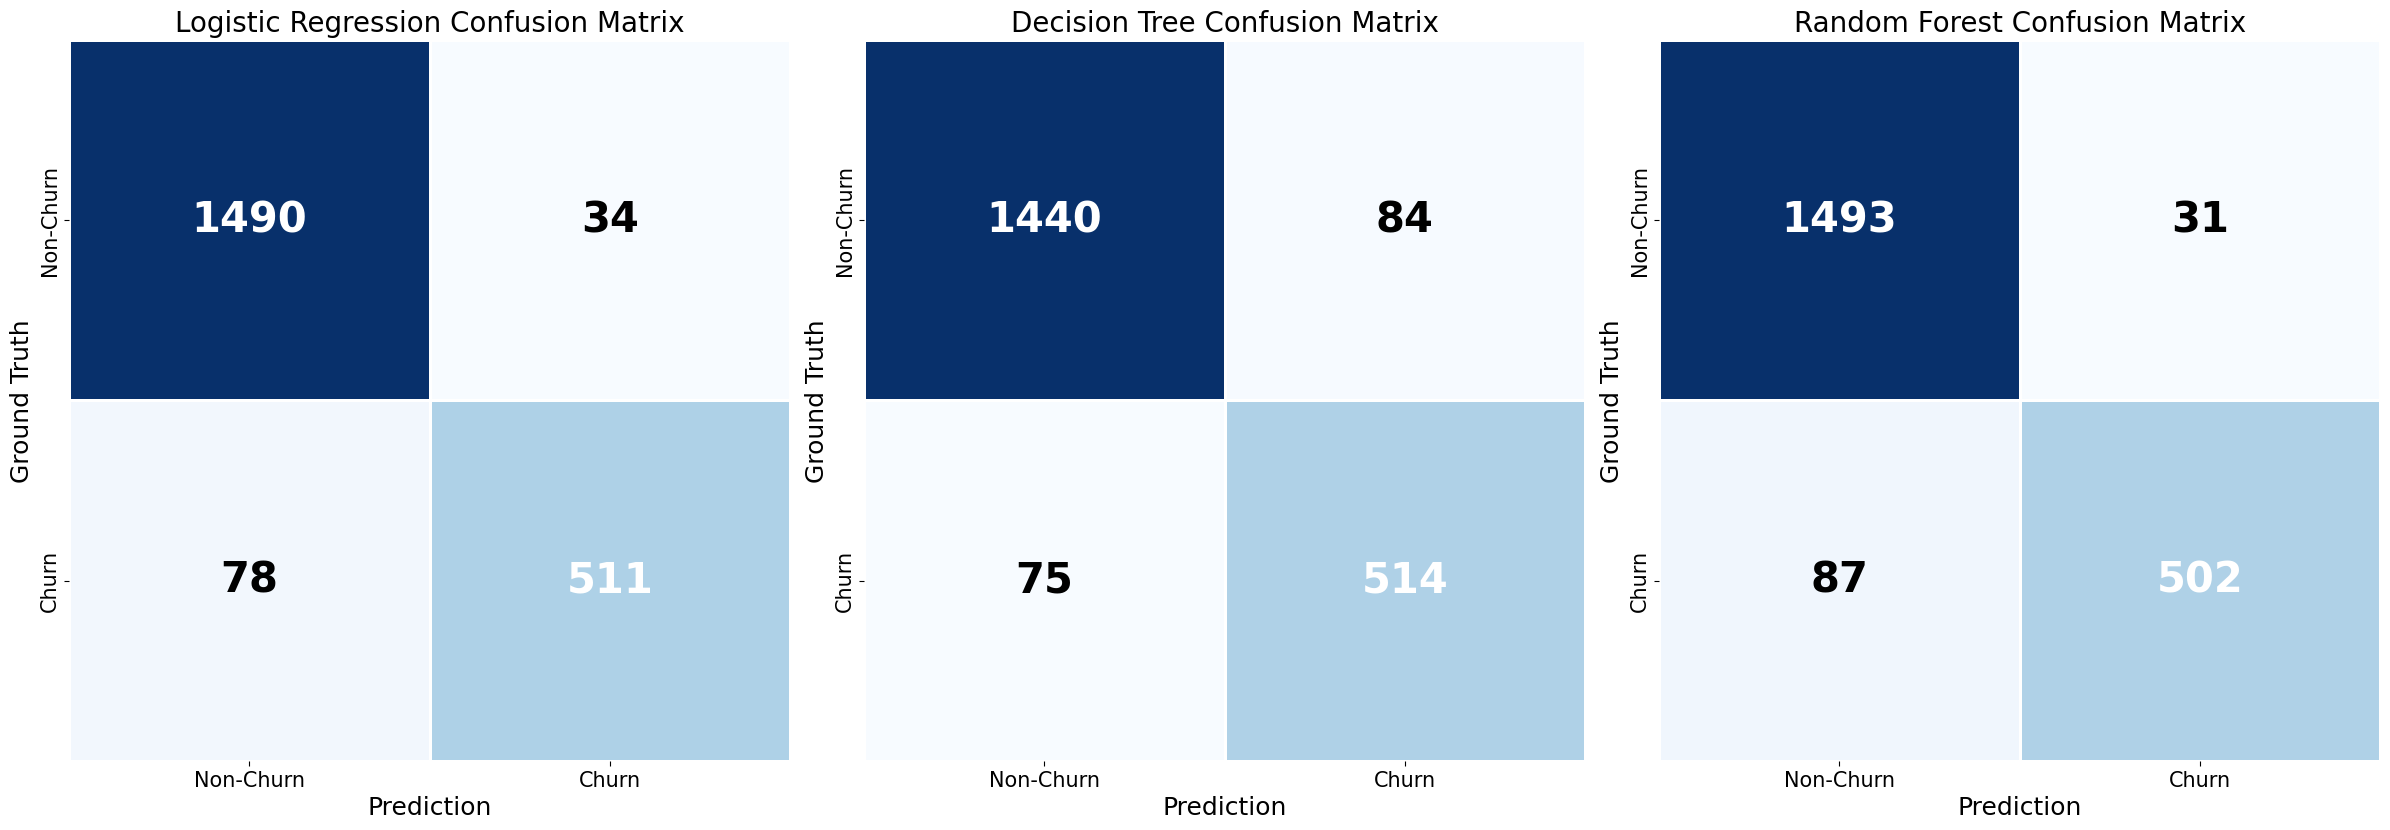

In [45]:
# Call the plot function
plot_confusion_matrices(y_test, y_pred_logreg, y_pred_dtree, y_pred_rf)


**Summary of the results:**

The logistic regression model achieved an accuracy of 94.7%, showing strong predictive performance with a balanced precision and recall, particularly for the majority class (non-churn). The decision tree model performed slightly worse, with an accuracy of 92.5%, but provided more interpretability, which may be valuable for understanding key drivers of churn. The random forest model performed comparably to logistic regression, with an accuracy of 94.4%, but provided better handling of complex patterns in the data, as indicated by slightly better precision for the minority class (churn).

Cross-validation results confirm that both logistic regression and random forest models are robust, with average accuracies of 94.9% each, while the decision tree model had a slightly lower cross-validated accuracy of 93.2%.

## Recommended Model

Based on the performance results, the logistic regression and random forest models both demonstrate high accuracy, but the choice depends on the balance between interpretability and predictive power.

While the random forest model is better at handling complex patterns in the data, the logistic regression model is easier to interpret and provides insights into feature importance. Given that the random forest model performs almost as well, and slightly better in certain aspects (e.g., precision for classifying churn), I recommend using the logistic regression model for its strong balance between accuracy and simplicity. It provides stakeholders with an interpretable solution, making it easier to understand which factors contribute most to customer churn, while still maintaining high predictive accuracy.

## Key Findings and Insights

The insights are mostly limited to performance metrics and model comparison. We focus on summarizing what the models reveal in terms of predictive accuracy and behavior for the **churn** prediction.

1. **Model Performance**: All three models—logistic regression, decision tree, and random forest—showed strong performance in predicting customer churn. Logistic regression and random forest were particularly effective, with overall accuracies of **94.7%** and **94.4%**, respectively, and both models provided good balance between precision and recall for both the churn and non-churn classes.

2. **Class Imbalance Handling**: Although the models performed well for the majority class (non-churn, 0), there was a slightly lower recall for the minority class (churn, 1). Both logistic regression and random forest models had difficulty identifying all churned customers, as seen by the lower recall values for class 1 (churn) compared to class 0 (non-churn). This suggests that while the models are accurate overall, they may be missing some customers who are at risk of churning.

3. **Precision vs. Recall**: Logistic regression had slightly better recall for churned customers compared to random forest, meaning it was able to capture more of the actual churn cases, though at the expense of a small increase in false positives (customers predicted to churn who did not). Random forest had a higher precision for the churn class, meaning it was better at correctly identifying customers who would churn without too many false positives.

4. **Confusion Matrix Interpretation**: Across all models, most of the errors occurred in predicting churned customers (class 1). For instance, in logistic regression, 78 customers who churned were misclassified as non-churners. This is an area for potential improvement, suggesting that additional features or tuning may help improve the recall for the churn class.

5. **Cross-Validation Consistency**: The cross-validation results show that both logistic regression and random forest models have **robust and consistent performance**, with cross-validated accuracies of **94.9%**. The decision tree, while less accurate overall, still showed reasonable performance with a cross-validation accuracy of **93.2%**.

In conclusion, the main insights from these models are not necessarily about specific features driving churn, but rather about the balance between the predictive accuracy and the behavior of each model in handling churned customers. The analysis suggests that churn is more challenging to predict than non-churn, and future work could focus on improving the recall for churn prediction, perhaps through feature engineering or more advanced models.

## Next Steps

Based on the results of our models, several actions can be taken to improve the analysis and the performance of customer churn prediction:

1. **Analyze Feature Importance**:
   - We should investigate which features are most important in predicting customer churn. This can help the business understand what factors contribute most to customers leaving. We can use the feature importance scores from Random Forest or the coefficients from Logistic Regression.
   - Tools like **SHAP** or **LIME** can also provide insights into how individual features impact the model’s predictions.

2. **Tune Hyperparameters**:
   - To improve model performance, we can fine-tune the parameters of models like Random Forest and Decision Trees. Using techniques like **Grid Search** or **Randomized Search** will help us find the best settings for each model.

3. **Enhance Feature Engineering**:
   - Creating new features based on existing data, such as combining customer tenure with contract type, or calculating average monthly charges, could improve the models. Additionally, bringing in external data like demographics or market trends might offer new insights for predicting churn.

4. **Handle Class Imbalance**:
   - The models struggled slightly with predicting customers who churned. We could use methods like **SMOTE** or **undersampling** to address the imbalance between churners and non-churners, which may improve recall for the minority class (customers who churn).

5. **Improve Model Interpretability**:
   - While complex models like Random Forest performed well, simpler models like Decision Trees or Logistic Regression are easier to interpret. We should consider a balance between accuracy and model interpretability, especially when communicating results to stakeholders.

6. **Explore Time-Based Patterns**:
   - Since customer churn could be affected by how long a customer has been with the company, exploring time-based trends might give us additional insights. Techniques like **time series analysis** could help us understand when customers are most likely to leave.

7. **Test on New Data**:
   - To ensure our model works well in the real world, we should test it on new, unseen data (for example, data from a different time period). This would help confirm the model's accuracy and ability to generalize to new situations.

By following these steps, we can continue to improve our churn prediction models and provide valuable insights to the business for customer retention.

---
### Author: Herianto, S.Si.

Copyright © 2024 All rights reserved | Herianto

<!--
## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2024-10-13        | 1.0     | Herianto   | Creating the file       |
--!>